# All code in this file has been refactored to src/modules/models.py

In [1]:
import pandas as pd
import numpy as np 

In [2]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True, as_frame=True)

In [3]:
type(X)

pandas.core.frame.DataFrame

In [4]:
print(X.shape)
X.head()

(442, 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [5]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Modelling & Evaluation

In [6]:
# function design --> params[], X, y
# returns: dicts: models

In [7]:
# metrics predict then evaluate
# RMSE, R2, Adjusted R2

In [8]:
# Gridsearch in seperate function

In [19]:
from sklearn.metrics import r2_score
def Adjusted_R2(R2, X):
    
    n = X.shape[0]
    p = X.shape[1]
    
    return 1-(1-R2)*(n-1)/(n-p-1)

## Regression

### linear / polynomial regression

In [10]:
## Regular, Ridge, Lasso, poly

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [13]:
# Linear
lin_reg = LinearRegression()
lin_reg.fit(X,y)

# Ridge
rdg_reg = Ridge(alpha=1)
rdg_reg.fit(X,y)

# Lasso
las_reg = Lasso(alpha=1)
las_reg.fit(X,y)

# Polynomial
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

### SVR

In [21]:
from sklearn.svm import SVR, LinearSVR

In [22]:
# Linear SVR
lin_svr_reg = LinearSVR(epsilon=0, C=1)
lin_svr_reg.fit(X,y)

# SVR
svr_reg = SVR(kernel='rbf', degree=3, coef0=0, C=1, epsilon=0.1)
svr_reg.fit(X,y)

SVR(C=1, coef0=0)

### Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
rf_reg = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, n_jobs=-1)
rf_reg.fit(X,y)

RandomForestRegressor(n_jobs=-1)

### Gradient Boost

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

In [26]:
gd_reg = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, max_depth=3, alpha=0.9)
gd_reg.fit(X, y)

GradientBoostingRegressor()

### XGBoost

In [29]:
import xgboost as xgb
from xgboost import XGBRegressor

In [30]:
#data_dmatrix = xgb.DMatrix(data=X,label=y)

In [34]:
xgb_reg = xgb.XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.3, gamma=0, reg_lambda=1, reg_alpha=0)
xgb_reg.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# Metrics

In [17]:
test_dict = {"LinReg": lin_reg, "Ridge": rdg_reg}

In [15]:
# Metrics
def regmodel_evaluation(model_dict, X_test, y_test):
    
    for key, value in model_dict.items():
        
        y_pred = value.predict(X_test)
        
        #metrics
        R2 = r2_score(y_test, y_pred)
        Adj_R2 = Adjusted_R2(R2, X_test)
        RMSE = mean_squared_error(y_test, y_pred, squared=False)
        
        print(f"{key} metrics:\n\tR2 = {R2}\n\tAdjusted R2 = {Adj_R2}\n\tRMSE = {RMSE}\n")
        print("*******************************************************************\n")

In [20]:
regmodel_evaluation(test_dict, X_test, y_test)

LinReg metrics:
	R2 = 0.45260660216173787
	Adjusted R2 = 0.38242796141324276
	RMSE = 53.8532569849144

*******************************************************************

Ridge metrics:
	R2 = 0.4191532397912693
	Adjusted R2 = 0.3446857064311756
	RMSE = 55.47444707448727

*******************************************************************



In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
def ensemble_feature_importance(model, X):
    
    feature_imp = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)
    feature_imp = feature_imp[feature_imp > 0.01]
    
    # Creating a bar plot
    sns.barplot(x=feature_imp, y=feature_imp.index)
    # Add labels to your graph
    plt.rcParams['figure.figsize'] = [8, 10]
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()

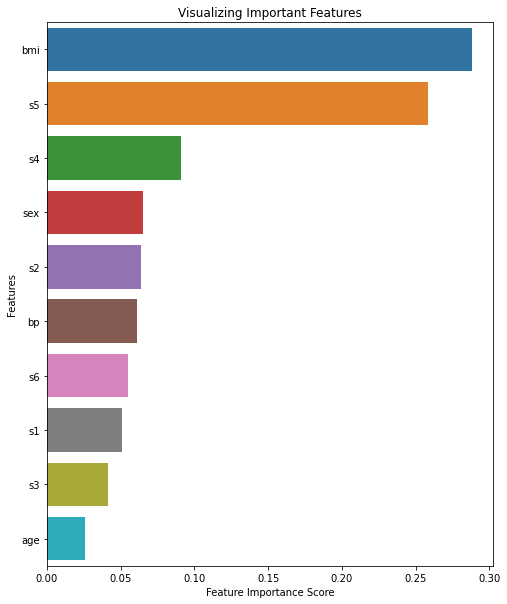

In [39]:
ensemble_feature_importance(xgb_reg, X)

# Grid search generalized function